<a href="https://colab.research.google.com/github/Maria-Data-Analyst/RRHH_Machine_Learning-/blob/main/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalación de paquetes necesarios
!pip install --upgrade google-cloud-bigquery  openpyxl scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
# Importación de librerías
import pandas as pd  # Manipulación y análisis de datos
import numpy as np   # Computación numérica
import matplotlib.pyplot as plt  # Visualización de datos
import seaborn as sns  # Visualización estadística
import plotly.express as px  # Visualización interactiva
from scipy import stats  # Funciones estadísticas
import re  # Expresiones regulares
from google.colab import files  # Funcionalidades específicas de Colab
from sklearn.tree import DecisionTreeClassifier  # Clasificación con árboles de decisión
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.utils import resample  # Técnicas de muestreo
from sklearn.ensemble import RandomForestClassifier  # Clasificación con bosques aleatorios
from sklearn.feature_selection import RFE  # Selección de características
from sklearn.linear_model import LogisticRegression  # Regresión logística
import statsmodels.api as sm  # Modelado estadístico
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluación del modelo
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('/content/datos_dummy.csv')

In [4]:
####### 1.Balancear el dataset con Undersampling

In [5]:
# Separar las clases
df_majority = df[df.attrition_yes == 0]
df_minority = df[df.attrition_yes == 1]

In [6]:
# Realizar undersampling en la clase mayoritaria
df_majority_downsampled = resample(df_majority,
                                   replace=False,  # Sin reemplazo
                                   n_samples=len(df_minority),  # Igualar tamaño a la clase minoritaria
                                   random_state=123)  # Para reproducibilidad

In [7]:
# Combinar las clases balanceadas
datos = pd.concat([df_majority_downsampled, df_minority])

In [8]:
# Verificar el balance de clases
print(datos.attrition_yes.value_counts())

attrition_yes
0    711
1    711
Name: count, dtype: int64


In [9]:
########## Dividir el conjunto de datos en conjuntos de entrenamiento y prueba

In [10]:
X= datos.drop(["attrition_yes"],axis=1)
y= datos["attrition_yes"]

In [11]:
X_ent,X_pru,y_ent,y_pru = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [12]:
########## DecisionTreeClassifier

In [13]:
# Crear el clasificador y ajustarlo a los datos de entrenamiento
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_ent, y_ent)


DecisionTreeClassifier(random_state=42)

Exactitud conjunto de Prueba: 0.87
Informe de clasificación conjunto de Prueba :
              precision    recall  f1-score   support

           0       0.97      0.78      0.86       143
           1       0.81      0.97      0.88       142

    accuracy                           0.87       285
   macro avg       0.89      0.87      0.87       285
weighted avg       0.89      0.87      0.87       285



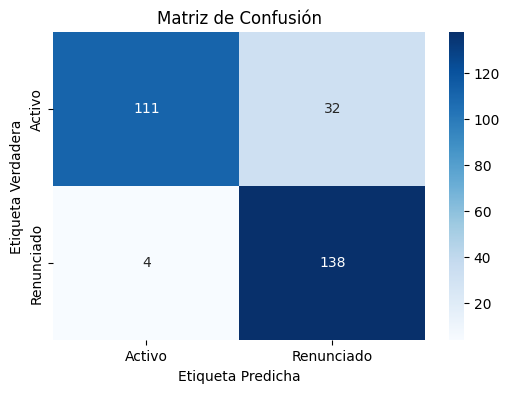

Matriz de confusión:
[[111  32]
 [  4 138]]


In [14]:
# Hacer predicciones en los datos de prueba
y_pred = clf.predict(X_pru)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_pru, y_pred)
print(f'Exactitud conjunto de Prueba: {accuracy:.2f}')

# Mostrar el informe de clasificación
print('Informe de clasificación conjunto de Prueba :')
print(classification_report(y_pru, y_pred))

# Calcular la matriz de confusión
cm = confusion_matrix(y_pru, y_pred)

# Crear una figura y un eje
plt.figure(figsize=(6, 4))

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Activo', 'Renunciado'],
            yticklabels=['Activo', 'Renunciado'])

# Añadir etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

# Mostrar la matriz de confusión
print('Matriz de confusión:')
print(confusion_matrix(y_pru, y_pred))

In [15]:
# Ver la importancia de las variables
importancia_variables = clf.feature_importances_

# Crear un DataFrame para ver las variables más importantes
importancia_df = pd.DataFrame({'Variable': X_ent.columns, 'Importancia': importancia_variables})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Ver las variables más importantes
print(importancia_df.head(20))

                             Variable  Importancia
44       rango_años_en_la_empresa_0_3     0.057830
7             education_field_medical     0.042485
18              marital_status_single     0.040576
23              education_universidad     0.039080
34                    rango_age_36_48     0.038809
56         rango_percent_salary_15_18     0.037871
15           job_role_sales_executive     0.036584
2   department_research_&_development     0.033128
31             rango_experiencia_8_16     0.032746
17             marital_status_married     0.028250
21             education_licenciatura     0.028103
19                        gender_male     0.028094
14        job_role_research_scientist     0.027776
0          business_travel_frequently     0.027488
8    education_field_technical_degree     0.026419
22                 education_maestría     0.024583
25            rango_num_companies_3_5     0.024250
48             rango_ingresos_10k_40k     0.023324
55         rango_percent_salary

In [16]:
# Hacer predicciones en los datos de entrenamiento
y_train_pred = clf.predict(X_ent)

# Calcular la exactitud en los datos de entrenamiento
train_accuracy = accuracy_score(y_ent, y_train_pred)
print(f'Exactitud en los datos de entrenamiento: {train_accuracy:.2f}')

# Hacer predicciones en los datos de prueba
y_test_pred = clf.predict(X_pru)

# Calcular la exactitud en los datos de prueba
test_accuracy = accuracy_score(y_pru, y_test_pred)
print(f'Exactitud en los datos de prueba: {test_accuracy:.2f}')

Exactitud en los datos de entrenamiento: 1.00
Exactitud en los datos de prueba: 0.87


In [17]:
# Profundidad del árbol
max_depth = clf.get_depth()
print(f'Profundidad del árbol: {max_depth}')

# Número de divisiones
num_splits = clf.tree_.node_count - clf.tree_.n_leaves
print(f'Número de divisiones: {num_splits}')

# Número de hojas
num_leaves = clf.tree_.n_leaves
print(f'Número de hojas: {num_leaves}')

Profundidad del árbol: 17
Número de divisiones: 214
Número de hojas: 215


In [18]:
# Evaluar el modelo usando validación cruzada
cv_scores = cross_val_score(clf, X, y, cv=5)  # cv es el número de particiones
print(f'Puntuaciones de validación cruzada: {cv_scores}')
print(f'Exactitud media de validación cruzada: {cv_scores.mean():.2f}')


Puntuaciones de validación cruzada: [0.89122807 0.89473684 0.91197183 0.9084507  0.88380282]
Exactitud media de validación cruzada: 0.90


In [19]:
##### 2. DecisionTreeClassifier con parametros ajustados

In [20]:
from sklearn.tree import DecisionTreeClassifier

# Crear el clasificador con parámetros ajustados
clf = DecisionTreeClassifier(
    max_depth=10,             # Limitar la profundidad del árbol para evitar el sobreajuste
    min_samples_split=5,      # Número mínimo de muestras necesarias para dividir un nodo
    min_samples_leaf=4,       # Número mínimo de muestras que debe tener una hoja
    random_state=42           # Semilla para la aleatoriedad
)

# Ajustar el clasificador a los datos de entrenamiento
clf.fit(X_ent, y_ent)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       random_state=42)

Exactitud en el conjunto de prueba: 0.73
Informe de clasificación del conjunto de prueba:
              precision    recall  f1-score   support

           0       0.75      0.69      0.72       143
           1       0.71      0.77      0.74       142

    accuracy                           0.73       285
   macro avg       0.73      0.73      0.73       285
weighted avg       0.73      0.73      0.73       285



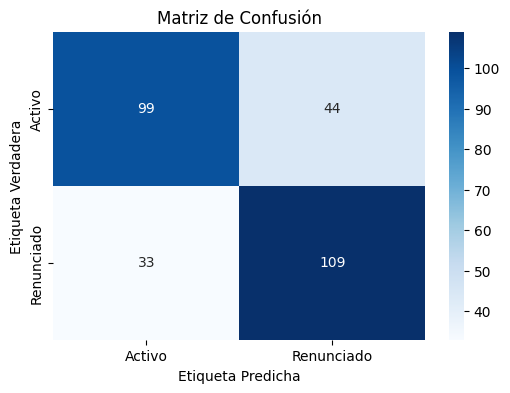

In [21]:
# Hacer predicciones en los datos de prueba
y_pred = clf.predict(X_pru)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_pru, y_pred)
print(f'Exactitud en el conjunto de prueba: {accuracy:.2f}')

# Mostrar el informe de clasificación
print('Informe de clasificación del conjunto de prueba:')
print(classification_report(y_pru, y_pred))

# Calcular la matriz de confusión
cm = confusion_matrix(y_pru, y_pred)

# Crear una figura y un eje para la matriz de confusión
plt.figure(figsize=(6, 4))

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Activo', 'Renunciado'],
            yticklabels=['Activo', 'Renunciado'])

# Añadir etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [22]:
# Hacer predicciones en los datos de entrenamiento
y_train_pred = clf.predict(X_ent)

# Calcular la exactitud en los datos de entrenamiento
train_accuracy = accuracy_score(y_ent, y_train_pred)
print(f'Exactitud en los datos de entrenamiento: {train_accuracy:.2f}')

# Hacer predicciones en los datos de prueba
y_test_pred = clf.predict(X_pru)

# Calcular la exactitud en los datos de prueba
test_accuracy = accuracy_score(y_pru, y_test_pred)
print(f'Exactitud en los datos de prueba: {test_accuracy:.2f}')

Exactitud en los datos de entrenamiento: 0.86
Exactitud en los datos de prueba: 0.73


In [23]:
# Profundidad del árbol
max_depth = clf.get_depth()
print(f'Profundidad del árbol: {max_depth}')

# Número de divisiones
num_splits = clf.tree_.node_count - clf.tree_.n_leaves
print(f'Número de divisiones: {num_splits}')

# Número de hojas
num_leaves = clf.tree_.n_leaves
print(f'Número de hojas: {num_leaves}')

Profundidad del árbol: 10
Número de divisiones: 127
Número de hojas: 128


In [24]:
# Evaluar el modelo usando validación cruzada
cv_scores = cross_val_score(clf, X, y, cv=7)  # cv es el número de particiones
print(f'Puntuaciones de validación cruzada: {cv_scores}')
print(f'Exactitud media de validación cruzada: {cv_scores.mean():.2f}')

Puntuaciones de validación cruzada: [0.71078431 0.67980296 0.69950739 0.75862069 0.69458128 0.71921182
 0.71428571]
Exactitud media de validación cruzada: 0.71


In [25]:
# Ver la importancia de las variables
importancia_variables = clf.feature_importances_

# Crear un DataFrame para ver las variables más importantes
importancia_df = pd.DataFrame({'Variable': X_ent.columns, 'Importancia': importancia_variables})
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# Ver las variables más importantes
print(importancia_df.head(20))

                             Variable  Importancia
44       rango_años_en_la_empresa_0_3     0.090135
18              marital_status_single     0.063242
19                        gender_male     0.050826
34                    rango_age_36_48     0.049771
21             education_licenciatura     0.045996
56         rango_percent_salary_15_18     0.044294
31             rango_experiencia_8_16     0.043742
23              education_universidad     0.039497
7             education_field_medical     0.038671
55         rango_percent_salary_11_14     0.037090
25            rango_num_companies_3_5     0.035885
2   department_research_&_development     0.032996
14        job_role_research_scientist     0.031645
15           job_role_sales_executive     0.025492
48             rango_ingresos_10k_40k     0.025486
0          business_travel_frequently     0.022977
8    education_field_technical_degree     0.021303
5       education_field_life_sciences     0.016924
36           rango_ultimo_ascen

In [26]:
##### 3. Balancear el conjunto de datos con SMOTE

In [27]:
# Ver la distribución de la variable objetivo
print(df['attrition_yes'].value_counts())

attrition_yes
0    3699
1     711
Name: count, dtype: int64


In [28]:
# Dividir en características y variable objetivo
X = df.drop('attrition_yes', axis=1)
y = df['attrition_yes']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [29]:
# Aplicar SMOTE para balancear el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [30]:
# Ver las nuevas distribuciones
print(pd.Series(y_train_resampled).value_counts())

attrition_yes
0    2584
1    2584
Name: count, dtype: int64



Matriz de Confusión:
[[865 250]
 [ 69 139]]

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.93      0.78      0.84      1115
           1       0.36      0.67      0.47       208

    accuracy                           0.76      1323
   macro avg       0.64      0.72      0.65      1323
weighted avg       0.84      0.76      0.78      1323



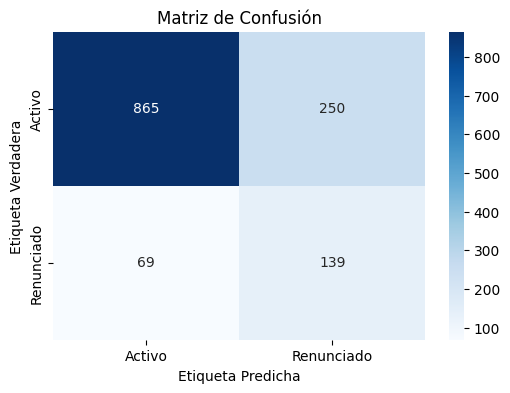

In [31]:
# Crear el clasificador con parámetros ajustados
model = DecisionTreeClassifier(
    max_depth=10,                # Profundidad máxima del árbol
    min_samples_split=5,         # Número mínimo de muestras requeridas para dividir un nodo
    min_samples_leaf=4,          # Número mínimo de muestras requeridas en una hoja
    random_state=42              # Semilla para la aleatoriedad
)

# Ajustar el modelo a los datos de entrenamiento resampleados
model.fit(X_train_resampled, y_train_resampled)

# Realizar predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
print("\nMatriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nInforme de Clasificación:")
print(classification_report(y_test, y_pred))

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una figura y un eje para la matriz de confusión
plt.figure(figsize=(6, 4))

# Visualizar la matriz de confusión
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Activo', 'Renunciado'],
            yticklabels=['Activo', 'Renunciado'])

# Añadir etiquetas y título
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()


In [32]:
# Realizar predicciones en los datos de entrenamiento y prueba
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Calcular la exactitud en los datos de entrenamiento
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print(f'Exactitud en el conjunto de entrenamiento: {train_accuracy:.2f}')

# Calcular la exactitud en los datos de prueba
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Exactitud en el conjunto de prueba: {test_accuracy:.2f}')


Exactitud en el conjunto de entrenamiento: 0.89
Exactitud en el conjunto de prueba: 0.76


In [33]:
# Realizar validación cruzada
cv_scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5)

# Mostrar las puntuaciones de validación cruzada
print("Puntuaciones de validación cruzada:", cv_scores)
print(f'Exactitud media de validación cruzada: {cv_scores.mean():.2f}')


Puntuaciones de validación cruzada: [0.80947776 0.86266925 0.86073501 0.84607938 0.86737657]
Exactitud media de validación cruzada: 0.85
